# Descriptive Statistics

### Importing important libraries

In [311]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from google.colab import drive

In [312]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [313]:
titanic = pd.read_csv("/content/drive/MyDrive/Dataset/titanic dataset/Titanic-Dataset.csv")

In [314]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [315]:
titanic.shape

(891, 12)

In [316]:
titanic = titanic.drop(columns = 'PassengerId')

In [317]:
titanic.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [318]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [319]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [320]:
print(titanic.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [321]:
titanic = titanic.dropna(subset=['Age'])

### 1.1 Mean

In [322]:
column = titanic.select_dtypes(include=["int64", "float64"]).columns

In [323]:
column

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [324]:
def calc_mean(inputs):
  n = len(inputs)
  sum = 0
  for i in inputs:
    sum += i
  return sum/n

for c in column:
  print(c, 'mean:', calc_mean(titanic[c]))

Survived mean: 0.4061624649859944
Pclass mean: 2.2366946778711485
Age mean: 29.69911764705882
SibSp mean: 0.5126050420168067
Parch mean: 0.43137254901960786
Fare mean: 34.69451400560218


### 1.2 Median

In [325]:
def calc_median(inputs):
  arr = sorted(inputs)
  n = len(arr)
  if n % 2 == 1:
    median = arr[(n//2)]
  else:
    median = (arr[n // 2 - 1] + arr[n // 2])/2
  return median

for c in column:
  print(c, 'median:', calc_median(titanic[c]))

Survived median: 0.0
Pclass median: 2.0
Age median: 28.0
SibSp median: 0.0
Parch median: 0.0
Fare median: 15.7417


### 1.3 Mode

In [326]:
def calc_mode(inputs):
  freq = {}   # dictionary for frequency count
  for val in inputs:
    if val in freq:
      freq[val] += 1
    else:
      freq[val] = 1
  # find max frequency
  max_count = max(freq.values())
  # all values that have max frequency (multimodal case handle)
  modes = [k for k, v in freq.items() if v == max_count]
  return modes      # multiple modes

for c in column:
  print(c, 'mode:', calc_mode(titanic[c]))

Survived mode: [0]
Pclass mode: [3]
Age mode: [24.0]
SibSp mode: [0]
Parch mode: [0]
Fare mode: [13.0]


### 1.4 min-max, Range

In [327]:
def min_max(inputs):
  arr = sorted(inputs)
  n = len(arr)
  min = arr[0]
  max = arr[n-1]
  range = max - min
  return {'min': min, 'max': max, 'range': range}

for c in column:
  print(c, min_max(titanic[c]))
  print('-'*10)

Survived {'min': 0, 'max': 1, 'range': 1}
----------
Pclass {'min': 1, 'max': 3, 'range': 2}
----------
Age {'min': 0.42, 'max': 80.0, 'range': 79.58}
----------
SibSp {'min': 0, 'max': 5, 'range': 5}
----------
Parch {'min': 0, 'max': 6, 'range': 6}
----------
Fare {'min': 0.0, 'max': 512.3292, 'range': 512.3292}
----------


### 1.5 Variance

In [328]:
def calc_variance(inputs):
  mean = calc_mean(inputs)
  sum_squared_diff = 0
  n = len(inputs)
  for i in inputs:
    sum_squared_diff += (i - mean)**2
  return (sum_squared_diff/n)

for c in column:
  print(c, 'variance:', calc_variance(titanic[c]))

Survived variance: 0.24119451702249717
Pclass variance: 0.7016787106999706
Age variance: 210.7235797536662
SibSp variance: 0.8632864910670125
Parch variance: 0.7270829900587654
Fare variance: 2796.4909524967265


### 1.6 Standard Deviation

In [329]:
def calc_std_dev(inputs):
  variance = calc_variance(inputs)
  return math.sqrt(variance)

for c in column:
  print(c, 'Standard Deviation:', calc_std_dev(titanic[c]))

Survived Standard Deviation: 0.49111558417799894
Pclass Standard Deviation: 0.837662647310939
Age Standard Deviation: 14.516321150817317
SibSp Standard Deviation: 0.9291321171216785
Parch Standard Deviation: 0.8526916148636419
Fare Standard Deviation: 52.881858444051744


### 1.7  Quartiles, Percentiles

In [330]:
def quartiles(inputs):
  arr = sorted(inputs)
  n = len(arr)
  Q2 = calc_median(arr)
  lower_half = arr[:n//2]
  upper_half = arr[n//2:]
  Q1 = calc_median(lower_half)
  Q3 = calc_median(upper_half)
  IQR = Q3 - Q1
  return {'Q1': Q1, 'Q2': Q2, 'Q3': Q3}

In [331]:
for c in column:
  print(c, quartiles(titanic[c]))
  print('-'*10)

Survived {'Q1': 0, 'Q2': 0.0, 'Q3': 1}
----------
Pclass {'Q1': 1, 'Q2': 2.0, 'Q3': 3}
----------
Age {'Q1': 20.0, 'Q2': 28.0, 'Q3': 38.0}
----------
SibSp {'Q1': 0, 'Q2': 0.0, 'Q3': 1}
----------
Parch {'Q1': 0, 'Q2': 0.0, 'Q3': 1}
----------
Fare {'Q1': 8.05, 'Q2': 15.7417, 'Q3': 33.5}
----------


# 2. Relationships

### 2.1 Covariance

Covariance is calculated between 2 features to measure how two variable change together.

Here lets take fare vs survival. To see if rich people have survived more.

In [332]:
def calc_covariance(x, y):
  n = len(x)
  sum = 0
  for i in range(n):
    sum += (x.iloc[i] - calc_mean(x)) * (y.iloc[i] - calc_mean(y))
  return sum/n

covariance = calc_covariance(titanic['Fare'], titanic['Survived'])
print('The covariance score between fare and survived is', covariance)

The covariance score between fare and survived is 6.96515467559572


### 2.2 Pearson correlation

Pearson correlation measures a linear relationship between two variables

In [333]:
def PCC(x, y):
  n = len(x)
  x_mean = calc_mean(x)
  y_mean = calc_mean(y)
  sum = 0
  sum_x = 0
  sum_y = 0
  for i in range(n):
    sum += ((x.iloc[i] - x_mean) * (y.iloc[i] - y_mean))
    sum_x += (x.iloc[i] - x_mean)**2
    sum_y += (y.iloc[i] - y_mean)**2
  return (sum) / math.sqrt(sum_x * sum_y)

pcc = PCC(titanic['Fare'], titanic['Survived'])
print('PCC score between fare and survived is', pcc)

PCC score between fare and survived is 0.2681886168744772


### 2.3 Spearman rank correlation coefficient

In [334]:
titanic['Fare_rank'] = titanic['Fare'].rank()
titanic['age_rank'] = titanic['Age'].rank()
srcc = PCC(titanic['Fare_rank'], titanic['age_rank'])

print('SRCC score between fare and age is', srcc)

SRCC score between fare and age is 0.13505121773428777


# 3. Probability and Distributions

### 3.1 Bernoulli Distribution

In [335]:
def ber_pmf(x):
  count = sum(1 for i in x if i==1)
  p = count/len(x)
  q = 1 - p
  return  p, q

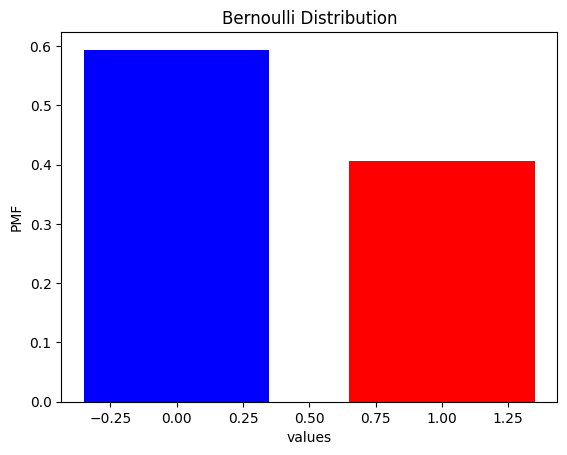

In [336]:
ber_pmf = ber_pmf(titanic['Survived'])
ber_values = [1, 0]

plt.bar(ber_values, ber_pmf, width= 0.7, color = ['red', 'blue']) # Creates a line plot
#or for a scatter plot:
# plt.plot(x_data, y_data, 'o') # 'o' specifies marker style (circles)
plt.xlabel("values")
plt.ylabel("PMF")
plt.title("Bernoulli Distribution")
plt.show()

In [337]:
#bernoulli mean
def ber_mean(x):
  count = sum(1 for i in x if i==1)
  p = count/(len(x))
  return p

ber_mean = ber_mean(titanic['Survived'])
print('Bernoulli Distrbution mean:', ber_mean)

Bernoulli Distrbution mean: 0.4061624649859944


In [338]:
# Bernoulli variance
def ber_var(inputs):
  p = ber_mean
  q = 1 - p
  return p*q

print('Bernoulli Distribution variance:', ber_var(titanic['Survived']))

Bernoulli Distribution variance: 0.24119451702249528


## 3.2 Binomial Distribution

In [339]:
def bin_pmf(inputs):
  n = len(inputs)
  prob_list = []
  p = sum(inputs)/n
  q = 1 - p
  for k in range(n):
    nCk = math.factorial(n) / (math.factorial(k) * (math.factorial(n-k)))
    f = nCk * (p ** k) * (q ** (n-k))
    prob_list.append(f)
  return prob_list

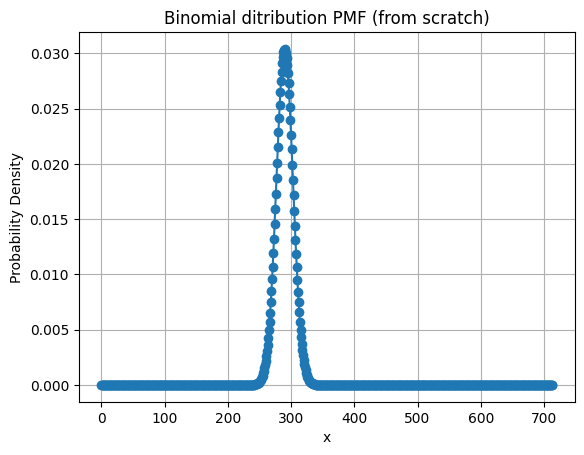

In [340]:
y_bin = bin_pmf(titanic['Survived'])
x_bin = list(range(len(y_bin))) #taking k on x_axis

plt.plot(x_bin, y_bin, marker='o')
plt.title("Binomial ditribution PMF (from scratch)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

In [341]:
# binomial mean
def bin_mean(inputs):
  n = len(inputs)
  k = sum(inputs)
  p = k/n
  return n * p
print('Binomial Distribution mean:', bin_mean(titanic['Survived']))

Binomial Distribution mean: 290.0


In [342]:
# Binomial Variance
def bin_var(inputs):
  n = len(inputs)
  k = sum(inputs)
  p = k/n
  q = 1 - p
  return n*p*q
print('Binomial Distribution variance:', bin_var(titanic['Survived']))

Binomial Distribution variance: 172.21288515406164


## 3.3 Uniform Distribution

In [343]:
def uni_pmf_discrete(inputs):
    unique_vals = sorted(set(inputs))
    n_unique = len(unique_vals)
    pmf_dict = {}
    for val in unique_vals:
        pmf_dict[val] = 1 / n_unique
    return pmf_dict

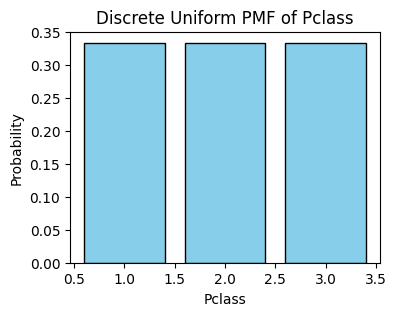

In [344]:
pmf_pclass = uni_pmf_discrete(titanic['Pclass'])

# Plot PMF
plt.figure(figsize=(4,3))
plt.bar(pmf_pclass.keys(), pmf_pclass.values(), color='skyblue', edgecolor='black')
plt.xlabel("Pclass")
plt.ylabel("Probability")
plt.title("Discrete Uniform PMF of Pclass")
plt.show()

In [345]:
pmf_dict = uni_pmf_discrete(titanic['Pclass'])
uni_mean = sum(k * v for k, v in pmf_dict.items())
uni_variance = sum(v * (k - uni_mean)**2 for k, v in pmf_dict.items())

print("Discrete Uniform (Pclass) mean:", uni_mean)
print("Discrete Uniform (Pclass) variance:", uni_variance)

Discrete Uniform (Pclass) mean: 2.0
Discrete Uniform (Pclass) variance: 0.6666666666666666


## 3.3 Normal/Gaussian Distribution

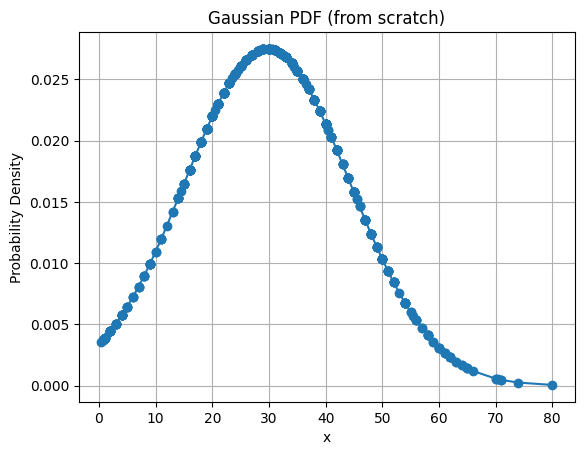

In [346]:
# Gaussian PDF

def gaus_pdf(inputs):
  variance = calc_variance(inputs)
  mean = calc_mean(inputs)
  pdf_values= []

  for i in inputs:
    exponent = ((i - mean) ** 2 ) / (2 * variance)
    base = 1/ (math.sqrt(2 * math.pi * variance))
    f = base * math.exp(- exponent)
    pdf_values.append(f)
  return pdf_values

#x_gaus =  titanic['Age']
x_gaus =  sorted(titanic['Age'])
y_gaus = gaus_pdf(x_gaus)

plt.plot(x_gaus, y_gaus, marker='o')
plt.title("Gaussian PDF (from scratch)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

In [347]:
#Gaussian Mean
gaus_mean =  calc_mean(titanic['Age'])
print('Gaussian Distribution mean:', gaus_mean)

Gaussian Distribution mean: 29.69911764705882


In [348]:
#Gaussian Variance
def calc_variance(values):
  mean = calc_mean(values)
  total = 0
  for x in values:
    total += (x - mean) ** 2
  return total / len(values)   # population variance (divide by n)
print('Gaussian Distribution variance:', calc_variance(titanic['Age']))

Gaussian Distribution variance: 210.7235797536662


## 3.4 Log-Normal Distribution

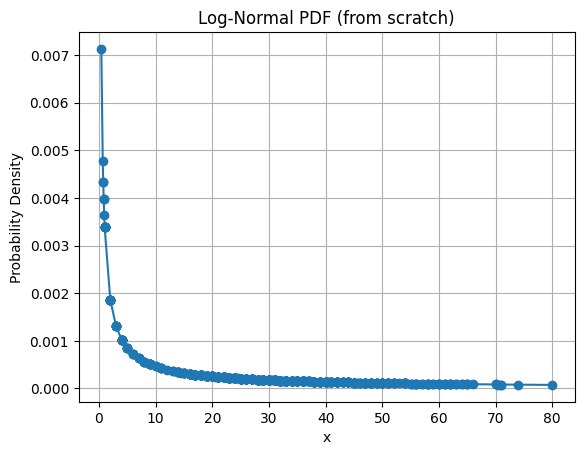

In [349]:
# we will use Fare feature here
# As it is always positive, right skewed

def log_nor_pdf(inputs):
  std_dev = calc_std_dev(inputs)
  mean = calc_mean(inputs)
  variance = calc_variance(inputs)
  pdf_values = []
  for i in inputs:
    if i <= 0:
      pdf_values.append(0)  # log-normal undefined for x <= 0
    else:
      base = 1 / (i* std_dev * math.sqrt(2 * math.pi))
      exponent = - (((math.log(i) - mean)**2) / (2 * variance))
      f = base * math.exp(exponent)
      pdf_values.append(f)
  return pdf_values

#x_gaus =  titanic['Age']
x_log =  sorted(titanic['Age'])
y_log = log_nor_pdf(x_gaus)

plt.plot(x_log, y_log, marker='o')
plt.title("Log-Normal PDF (from scratch)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

In [350]:
#Log-Normal Mean
def log_nor_mean(inputs):
  log_values = [math.log(x) for x in inputs if x > 0]
  exponent = calc_mean(log_values) + (calc_variance(log_values)/2)
  return math.exp(exponent)
  #return math.exp(calc_mean(inputs) + (calc_variance(inputs)/2))

print('Log Normal Distribution mean:', log_nor_mean(titanic['Fare']))

Log Normal Distribution mean: 31.632928410521533


In [351]:
#log-Normal variance

def log_nor_var(inputs):
  log_values = [math.log(x) for x in inputs if x > 0]
  variance = calc_variance(log_values)
  mean = calc_mean(log_values)
  base = math.exp(variance) - 1
  exponent = math.exp((2* mean) + variance)
  return base * exponent

print('Log Normal Distribution variance:', log_nor_var(titanic['Fare']))

Log Normal Distribution variance: 1452.1641775860173
